<a href="https://colab.research.google.com/github/Bhavinsolanki369/Pizza-Store-Aanalysis-Tableau-SQL-py/blob/main/HR_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#first job is to import requirred libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#now i have uploaded file on drive, and stored its file path in variable,path
path = '/content/drive/MyDrive/Sample_HR.csv'

In [8]:
# as our data is in .csv format we use pr.read_csv to create DataFrame(df)
#then to see data we simply print df.
df = pd.read_csv(path)
df

,Employee_ID,First Name,Last Name,Gender,MaritalStatus,Department,Grade,Employee_Count,Job_Satisfaction,MonthlyIncome,MonthlyRate,Age,Job Type,Job Experience,Hire_Date,Company_Environment,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,Country
0,1,Shelia,Mahoney,Male,Single,Sales,2,1,4,5993,19479,41.0,Permannent,16,1/1/2010,5,0,1,6,United Kingdom
1,2,Jo,Rivers,Female,Married,TECH,2,1,2,5130,24907,49.0,Contractual,14,2/1/2012,3,3,3,10,United States
2,3,Sheryl,Lowery,Female,Single,TECH,1,1,3,2090,2396,37.0,Contractual,14,2/2/2012,4,3,3,0,Australia
3,4,Whitney,Hooper,Male,Married,TECH,1,1,3,2909,23159,33.0,Contractual,14,2/3/2012,4,3,3,8,Australia
4,5,Lindsey,Rice,Female,Married,Manfacturing,1,1,2,3468,16632,27.0,Contractual,14,2/4/2012,1,3,3,2,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,1466,Shelley,Benjamin,Male,Married,NaN,2,1,4,2571,12290,36.0,Contractual,8,2/1/2019,3,3,3,5,France
1498,1467,Isaiah,Jarvis,Male,Married,NaN,3,1,5,9991,21457,39.0,Contractual,8,2/2/2019,5,5,3,7,France
1499,1468,Nathan,Sutton,Female,Married,NaN,2,1,2,6142,5174,27.0,Contractual,8,2/3/2019,2,0,3,6,France
1500,1469,Earl,Mccullough,Female,Married,Sales,2,1,2,5390,13243,49.0,Contractual,8,2/4/2019,4,3,2,9,France


In [9]:
# we want to how many rows and colums are there, basicaly the shape of our df
rows = df.shape[0]
cols = df.shape[1]
print('total rows: ',rows)
print('total columns: ', cols)

total rows:  1502
total columns:  20


In [10]:
# now we need to check for duplicate values
duplicates = df[df.duplicated()].shape[0]
print('we have ',duplicates,' duplicated values in our dataset, that we should delete.')

we have  32  duplicated values in our dataset, that we should delete.


In [11]:
df.drop_duplicates(inplace=True)
df.shape  #(rows, cols)

(1470, 20)

In [12]:
# now to see summary view
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1501
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1470 non-null   int64  
 1   First Name             1470 non-null   object 
 2   Last Name              1470 non-null   object 
 3   Gender                 1470 non-null   object 
 4   MaritalStatus          1470 non-null   object 
 5   Department             1432 non-null   object 
 6   Grade                  1470 non-null   int64  
 7   Employee_Count         1470 non-null   int64  
 8   Job_Satisfaction       1470 non-null   int64  
 9   MonthlyIncome          1470 non-null   int64  
 10  MonthlyRate            1470 non-null   int64  
 11  Age                    1446 non-null   float64
 12  Job Type               1470 non-null   object 
 13  Job Experience         1470 non-null   int64  
 14  Hire_Date              1470 non-null   object 
 15  Company_E

In [13]:
avg_age = int(df['Age'].mean())
print('Averege age of amployees is ',avg_age,'.')

Averege age of amployees is  36 .


In [14]:
# so we will replace AGE.null values with average
# we could have passed var: avg_age
#but for sake of clarity we are passing full code
#inplace=True so that this is a permanant change

df.fillna(int(df['Age'].mean()),inplace=True)
df['Age'].info()

# from AGE shape we can see that all null values are replaced

<class 'pandas.core.series.Series'>
Index: 1470 entries, 0 to 1501
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
1470 non-null   float64
dtypes: float64(1)
memory usage: 23.0 KB


In [15]:
#wonder why we are replacing 36 with null, as we were supposed to replace null value from Dept
# while filling null values in AGE col, i accidentally filled all null values
#in data set with 36
# therefore we are first replacing 36 with null
# however we could have directly replace 36 with required string 'Data Engineering'
df['Department'] = df['Department'].replace(36,np.nan)

In [16]:
# to check all unique values in col
df['Department'].unique()

array(['Sales', 'TECH', 'Manfacturing', 'Human Resources', nan],
      dtype=object)

In [17]:
# to replace null with 'Data Engireening'
df['Department'] = df['Department'].replace(np.nan,'Data Engineering')

In [18]:
# to againg varify all unique values in col
df['Department'].unique()

array(['Sales', 'TECH', 'Manfacturing', 'Human Resources',
       'Data Engineering'], dtype=object)

In [19]:
# Here i want full name of employees therefore we have concatenated first & last name
# and stored result in a new column: Full Name
df['Full Name'] = df['First Name'] + ' ' + df['Last Name']
df

,Employee_ID,First Name,Last Name,Gender,MaritalStatus,Department,Grade,Employee_Count,Job_Satisfaction,MonthlyIncome,...,Age,Job Type,Job Experience,Hire_Date,Company_Environment,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,Country,Full Name
0,1,Shelia,Mahoney,Male,Single,Sales,2,1,4,5993,...,41.0,Permannent,16,1/1/2010,5,0,1,6,United Kingdom,Shelia Mahoney
1,2,Jo,Rivers,Female,Married,TECH,2,1,2,5130,...,49.0,Contractual,14,2/1/2012,3,3,3,10,United States,Jo Rivers
2,3,Sheryl,Lowery,Female,Single,TECH,1,1,3,2090,...,37.0,Contractual,14,2/2/2012,4,3,3,0,Australia,Sheryl Lowery
3,4,Whitney,Hooper,Male,Married,TECH,1,1,3,2909,...,33.0,Contractual,14,2/3/2012,4,3,3,8,Australia,Whitney Hooper
4,5,Lindsey,Rice,Female,Married,Manfacturing,1,1,2,3468,...,27.0,Contractual,14,2/4/2012,1,3,3,2,Australia,Lindsey Rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,1466,Shelley,Benjamin,Male,Married,Data Engineering,2,1,4,2571,...,36.0,Contractual,8,2/1/2019,3,3,3,5,France,Shelley Benjamin
1498,1467,Isaiah,Jarvis,Male,Married,Data Engineering,3,1,5,9991,...,39.0,Contractual,8,2/2/2019,5,5,3,7,France,Isaiah Jarvis
1499,1468,Nathan,Sutton,Female,Married,Data Engineering,2,1,2,6142,...,27.0,Contractual,8,2/3/2019,2,0,3,6,France,Nathan Sutton
1500,1469,Earl,Mccullough,Female,Married,Sales,2,1,2,5390,...,49.0,Contractual,8,2/4/2019,4,3,2,9,France,Earl Mccullough


In [20]:
# relocating full name clm from last to 4th clm
columns = df.columns.tolist()
last_name_index = columns.index('Last Name')
columns.insert(last_name_index + 1,columns.pop(columns.index('Full Name')))
df = df[columns]
df.head()

,Employee_ID,First Name,Last Name,Full Name,Gender,MaritalStatus,Department,Grade,Employee_Count,Job_Satisfaction,...,MonthlyRate,Age,Job Type,Job Experience,Hire_Date,Company_Environment,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,Country
0,1,Shelia,Mahoney,Shelia Mahoney,Male,Single,Sales,2,1,4,...,19479,41.0,Permannent,16,1/1/2010,5,0,1,6,United Kingdom
1,2,Jo,Rivers,Jo Rivers,Female,Married,TECH,2,1,2,...,24907,49.0,Contractual,14,2/1/2012,3,3,3,10,United States
2,3,Sheryl,Lowery,Sheryl Lowery,Female,Single,TECH,1,1,3,...,2396,37.0,Contractual,14,2/2/2012,4,3,3,0,Australia
3,4,Whitney,Hooper,Whitney Hooper,Male,Married,TECH,1,1,3,...,23159,33.0,Contractual,14,2/3/2012,4,3,3,8,Australia
4,5,Lindsey,Rice,Lindsey Rice,Female,Married,Manfacturing,1,1,2,...,16632,27.0,Contractual,14,2/4/2012,1,3,3,2,Australia


In [29]:
# Q is to find number of year, a amployee is with our CO.
# we have hiredate in our data, so logically current year LESS hireyear is our anaswer.
# To codify this logic to in python we are using datetime from datetime library

#remember this for data time functions
from datetime import datetime

#using Date timr we extract year from hiredate
hireyear = pd.to_datetime(df['Hire_Date']).dt.year

#using now().year    function we get current date
currentyear = datetime.now().year

# finally we store both above values in a variable and creat new clm from there calculation using our logic
df['YearsAtCompany'] = currentyear - hireyear
df

,Employee_ID,First Name,Last Name,Full Name,Gender,MaritalStatus,Department,Grade,Employee_Count,Job_Satisfaction,...,Salary,Age,Job Type,Job Experience,Hire_Date,YearsAtCompany,Company_Environment,TrainingTimesLastYear,WorkLifeBalance,Country
0,1,Shelia,Mahoney,Shelia Mahoney,Male,Single,Sales,2,1,4,...,19479,41.0,Permannent,16,1/1/2010,14,5,0,1,United Kingdom
1,2,Jo,Rivers,Jo Rivers,Female,Married,TECH,2,1,2,...,24907,49.0,Contractual,14,2/1/2012,12,3,3,3,United States
2,3,Sheryl,Lowery,Sheryl Lowery,Female,Single,TECH,1,1,3,...,2396,37.0,Contractual,14,2/2/2012,12,4,3,3,Australia
3,4,Whitney,Hooper,Whitney Hooper,Male,Married,TECH,1,1,3,...,23159,33.0,Contractual,14,2/3/2012,12,4,3,3,Australia
4,5,Lindsey,Rice,Lindsey Rice,Female,Married,Manfacturing,1,1,2,...,16632,27.0,Contractual,14,2/4/2012,12,1,3,3,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,1466,Shelley,Benjamin,Shelley Benjamin,Male,Married,Data Engineering,2,1,4,...,12290,36.0,Contractual,8,2/1/2019,5,3,3,3,France
1498,1467,Isaiah,Jarvis,Isaiah Jarvis,Male,Married,Data Engineering,3,1,5,...,21457,39.0,Contractual,8,2/2/2019,5,5,5,3,France
1499,1468,Nathan,Sutton,Nathan Sutton,Female,Married,Data Engineering,2,1,2,...,5174,27.0,Contractual,8,2/3/2019,5,2,0,3,France
1500,1469,Earl,Mccullough,Earl Mccullough,Female,Married,Sales,2,1,2,...,13243,49.0,Contractual,8,2/4/2019,5,4,3,2,France


In [22]:
# using same logic to relocate clm at new index location using tolist/index/pop functions

columns = df.columns.tolist()
hire_date_index = columns.index('Hire_Date')
columns.insert(hire_date_index + 1,columns.pop(columns.index('YearsAtCompany')))
df = df[columns]
df.head()

,Employee_ID,First Name,Last Name,Full Name,Gender,MaritalStatus,Department,Grade,Employee_Count,Job_Satisfaction,...,MonthlyRate,Age,Job Type,Job Experience,Hire_Date,YearsAtCompany,Company_Environment,TrainingTimesLastYear,WorkLifeBalance,Country
0,1,Shelia,Mahoney,Shelia Mahoney,Male,Single,Sales,2,1,4,...,19479,41.0,Permannent,16,1/1/2010,14,5,0,1,United Kingdom
1,2,Jo,Rivers,Jo Rivers,Female,Married,TECH,2,1,2,...,24907,49.0,Contractual,14,2/1/2012,12,3,3,3,United States
2,3,Sheryl,Lowery,Sheryl Lowery,Female,Single,TECH,1,1,3,...,2396,37.0,Contractual,14,2/2/2012,12,4,3,3,Australia
3,4,Whitney,Hooper,Whitney Hooper,Male,Married,TECH,1,1,3,...,23159,33.0,Contractual,14,2/3/2012,12,4,3,3,Australia
4,5,Lindsey,Rice,Lindsey Rice,Female,Married,Manfacturing,1,1,2,...,16632,27.0,Contractual,14,2/4/2012,12,1,3,3,Australia


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TECH'),
  Text(1, 0, 'Sales'),
  Text(2, 0, 'Human Resources'),
  Text(3, 0, 'Data Engineering'),
  Text(4, 0, 'Manfacturing')])

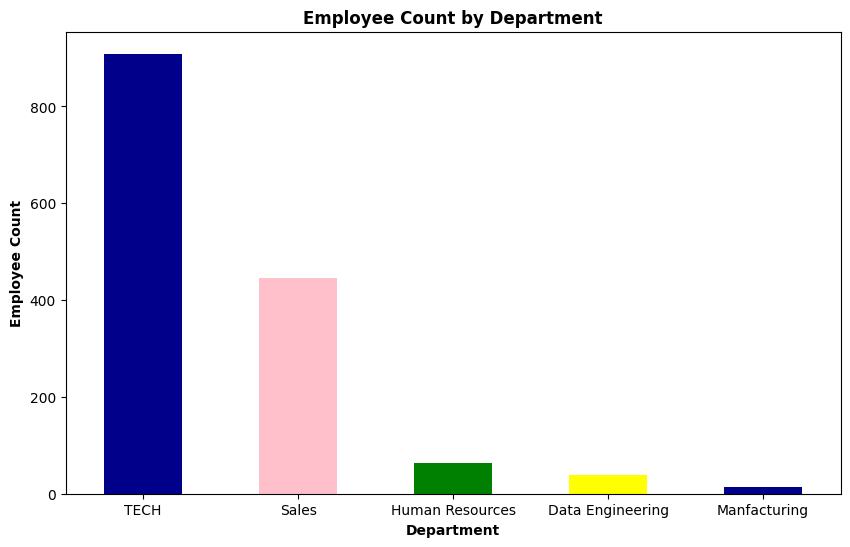

In [23]:
#This is how we can create a bar chart using matplotlib   df.plot(kind='bar')

Dept_wise_count = df['Department'].value_counts()
colors = ['darkblue','pink','green','yellow']
plt.figure(figsize=(10,6))
Dept_wise_count.plot(kind='bar',color=colors)
plt.title('Employee Count by Department',fontweight='bold')
plt.xlabel('Department',fontweight='bold')
plt.ylabel('Employee Count',fontweight='bold')
plt.xticks(rotation=0)


Text(0, 0.5, 'Employee Count')

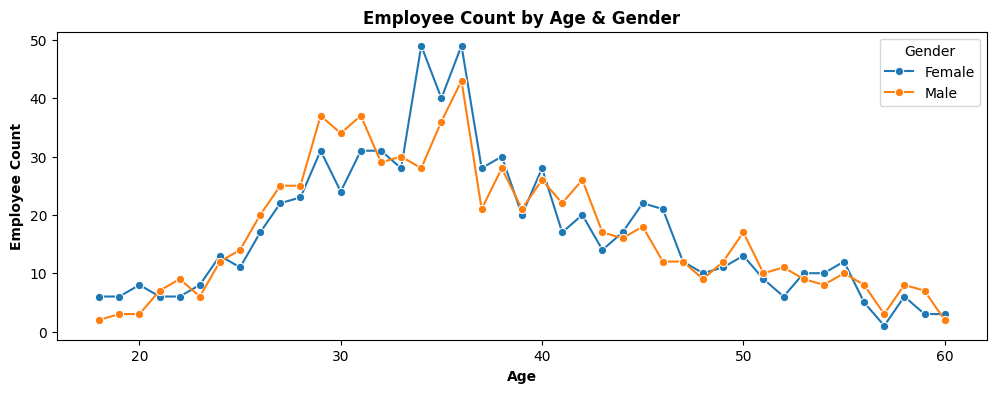

In [24]:
# line chart using seaborn    sns.lineplot

age_gender = df.groupby(['Age','Gender']).size().reset_index(name='Count')
age_gender
plt.figure(figsize=(12,4))
sns.lineplot(data= age_gender,x= 'Age',y= 'Count',hue= 'Gender', marker= 'o')
plt.title('Employee Count by Age & Gender',fontweight='bold')
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Employee Count',fontweight='bold')


Text(0.5, 1.0, 'Strenght by Marital Status')

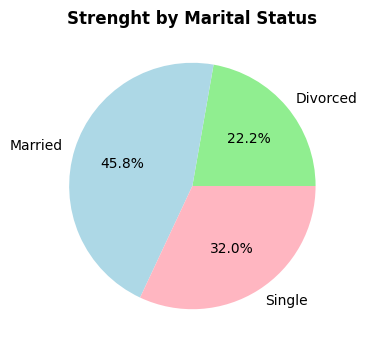

In [25]:
# pie chart using Matplotlib   plt.pie(x= measure value, labels= dimension)

Marital_Status_count = df.groupby(['MaritalStatus']).size().reset_index(name='Count')
count= Marital_Status_count['Count']
marital_status = Marital_Status_count['MaritalStatus']
plt.figure(figsize=(4,4))
colors = ['lightgreen','lightblue','lightpink']
plt.pie(x=count,labels= marital_status,colors= colors,autopct='%1.1f%%')   #autopct ='%1.1f%%' gives inside labels(percents)
plt.title('Strenght by Marital Status',fontweight= 'bold')


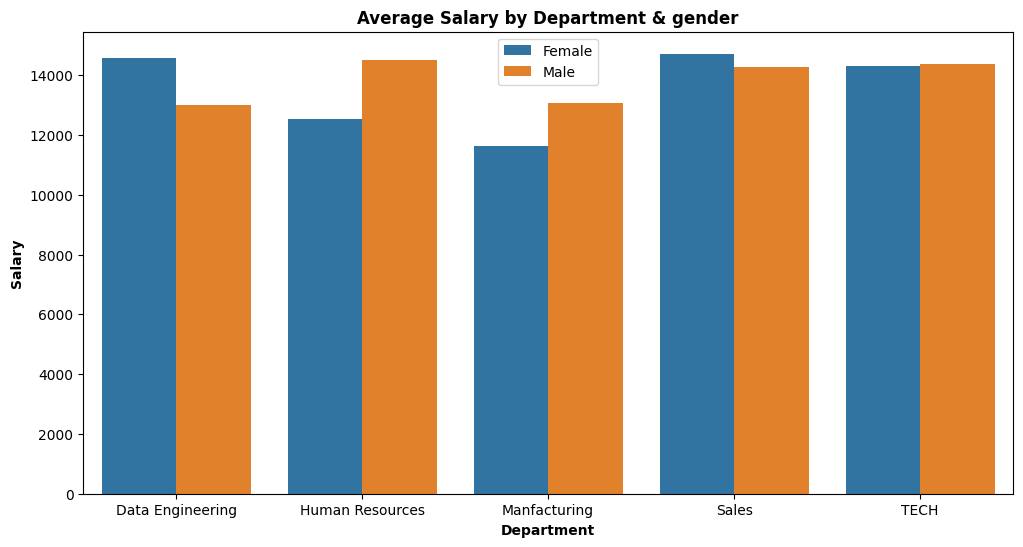

In [26]:
# we are plotting multiple bars  sns.barplot(data=,x= dimension,y=value, hue= sub_dimension)

df = df.rename(columns = {'MonthlyRate' :'Salary'})
Average_Salary = df.groupby(['Department','Gender'])['Salary'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=Average_Salary,x= 'Department',y='Salary',hue= 'Gender')
plt.title('Average Salary by Department & gender',fontweight = 'bold')
plt.xlabel('Department',fontweight= 'bold')
plt.ylabel('Salary',fontweight= 'bold')
plt.legend(loc=0) #(loc=0/best, 1/top right corner)

Text(0, 0.5, 'Number of Employees')

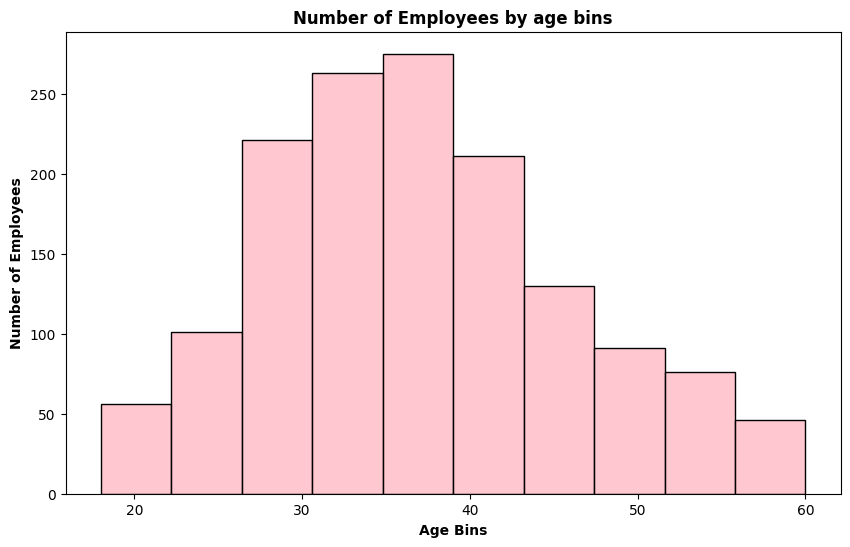

In [27]:
# simlpe Histogram by Seaborn  sns.histplot(data=DF,x= bins on this, bins= size:10,15,..,color= )
age = df['Age'].reset_index()
plt.figure(figsize=(10,6))
sns.histplot(data= age,x= 'Age',bins= 10,color='lightpink')
plt.title('Number of Employees by age bins',fontweight='bold')
plt.xlabel('Age Bins',fontweight='bold')
plt.ylabel('Number of Employees',fontweight='bold')

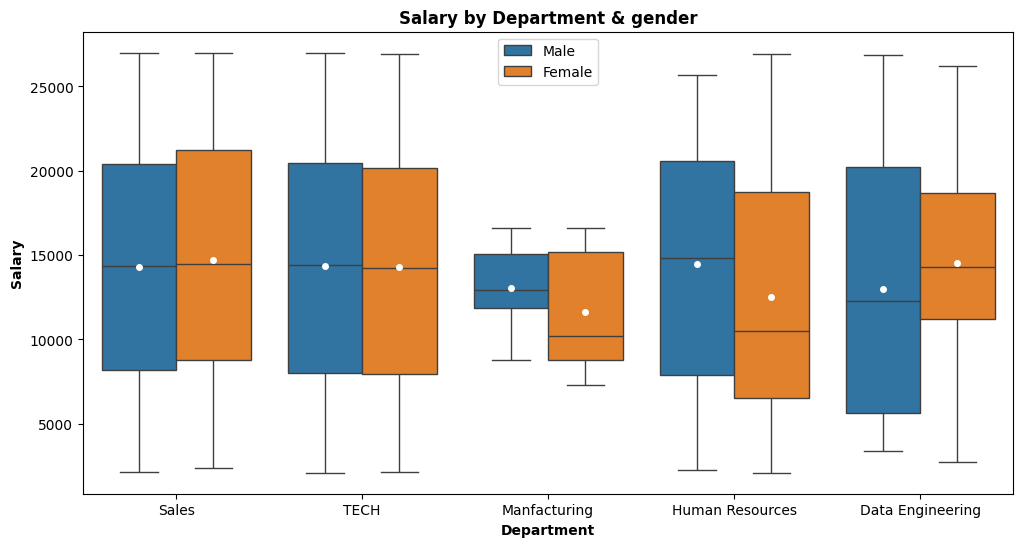

In [28]:
# boxplot using Seaborn   As    sns.boxplot(data=df, x= dimension, y= measure, hue= sub_dimension, showmeans= True,meanporps={mroperties of meean marker})
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x= 'Department',y='Salary',hue= 'Gender',showmeans = True,meanprops={"marker": "o",
                                                                                        "markeredgecolor": "white",
                                                                                         "markerfacecolor": "White",
                                                                                        "markersize": "4"})
plt.title('Salary by Department & gender',fontweight = 'bold')
plt.xlabel('Department',fontweight= 'bold')
plt.ylabel('Salary',fontweight= 'bold')
plt.legend(loc=9)   #(loc=9/top center,loc=8/bottom center, 4/ bottom right corner)